# Landsat and Sentinel comparison

In [1]:
% matplotlib inline
from datacube.storage import masking
from datacube import Datacube
from datetime import datetime
from skimage import exposure

import sys
import os
sys.path.append(os.path.abspath('/g/data/r78/cek156/dea-notebooks/algorithms'))
import DEAPlotting
import DEADataHandling

## Set up the extraction query

In [2]:
query = {'lat': (-29.97, -30.04),
         'lon': (146.86, 146.93),
         'output_crs': 'EPSG:3577',
         'resolution': (-10, 10),
         'time' :('2016-08-01', '2016-08-20')
        }

## First, access the Sentinel data

In [3]:
# Replace '156' and 'cek156' with the path to your own home directory on the VDI
s2aws = Datacube(config='/home/156/cek156/Sentinel2_datacube.conf')

Sentineldata = s2aws.load(product='s2a_ard_granule', group_by='solar_day', **query)

In [4]:
Sentineldata

<xarray.Dataset>
Dimensions:        (time: 1, x: 756, y: 858)
Coordinates:
  * time           (time) datetime64[ns] 2016-08-14T00:21:53.535500
  * y              (y) float64 -3.342e+06 -3.342e+06 -3.342e+06 -3.342e+06 ...
  * x              (x) float64 1.414e+06 1.414e+06 1.414e+06 1.414e+06 ...
Data variables:
    pixel_quality  (time, y, x) uint8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    contiguity     (time, y, x) uint8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    aerosol        (time, y, x) int16 406 363 363 363 363 363 363 359 359 ...
    blue           (time, y, x) int16 447 536 421 348 356 410 413 390 403 ...
    green          (time, y, x) int16 892 1002 876 761 721 782 827 850 827 ...
    red            (time, y, x) int16 897 1015 776 580 541 638 706 735 710 ...
    rededge1       (time, y, x) int16 1622 1506 1506 1341 1341 1418 1418 ...
    rededge2       (time, y, x) int16 2942 3178 3178 3191 3191 2985 2985 ...
    rededge3       (time, y, x) int16 3017 3360 3360 3357 3

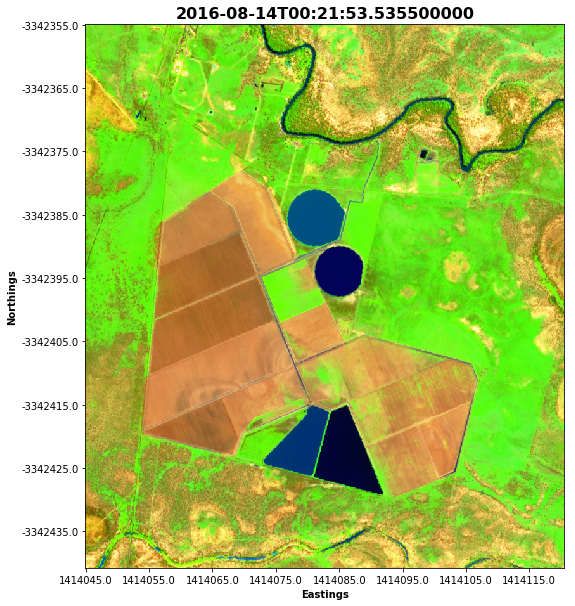

In [5]:
DEAPlotting.three_band_image(Sentineldata, bands = ['swir1', 'nir1', 'green'])

## Then access Landsat data

In [6]:
dc = Datacube(app = 'test')

Landsatdata = dc.load(product='ls8_nbar_albers', group_by='solar_day', **query)

In [7]:
Landsatdata

<xarray.Dataset>
Dimensions:          (time: 1, x: 756, y: 858)
Coordinates:
  * time             (time) datetime64[ns] 2016-08-06T00:07:40
  * y                (y) float64 -3.342e+06 -3.342e+06 -3.342e+06 -3.342e+06 ...
  * x                (x) float64 1.414e+06 1.414e+06 1.414e+06 1.414e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 312 312 280 280 304 304 304 326 326 ...
    blue             (time, y, x) int16 306 306 262 262 284 284 284 310 310 ...
    green            (time, y, x) int16 802 802 711 711 733 733 733 774 774 ...
    red              (time, y, x) int16 641 641 519 519 586 586 586 643 643 ...
    nir              (time, y, x) int16 3773 3773 3733 3733 3561 3561 3561 ...
    swir1            (time, y, x) int16 1598 1598 1439 1439 1458 1458 1458 ...
    swir2            (time, y, x) int16 875 875 726 726 773 773 773 809 809 ...
Attributes:
    crs:      EPSG:3577

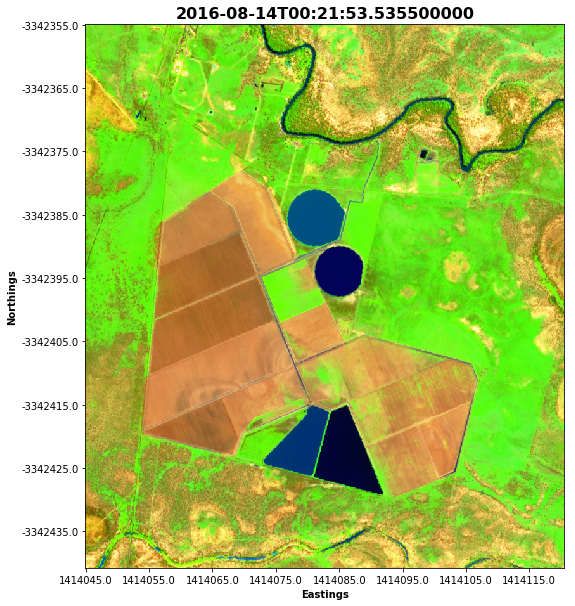

In [8]:
DEAPlotting.three_band_image(Sentineldata, bands = ['swir1', 'nir1', 'green'])

## Compare Landsat and Sentinel2 for a single pixel

In [9]:
pixely = -29.991413
pixelx = 146.897277

### This time we would like to remove clouds from the image, so we will use the DEADataHandling function load_nbarx, which automatically filters for cloud

In [15]:
query = {'lat': (pixely - 0.0001, pixely + 0.0001),
         'lon': (pixelx -0.0001, pixelx + 0.0001),
         'output_crs': 'EPSG:3577',
         'resolution': (-10, 10),
        }

Sentineldatapixel, S2crs, S2affine = DEADataHandling.load_sentinel(s2aws, 's2a_ard_granule', query)
Landsatdatapixel, LScrs, LSaffine = DEADataHandling.load_nbarx(dc, 'ls8', query, product = 'nbar')

loading s2a_ard_granule
loaded s2a_ard_granule
making mask
loading ls8_nbar_albers
loaded ls8_nbar_albers
making mask ls8_pq_albers
masked ls8_nbar_albers with ls8_pq_albers


/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


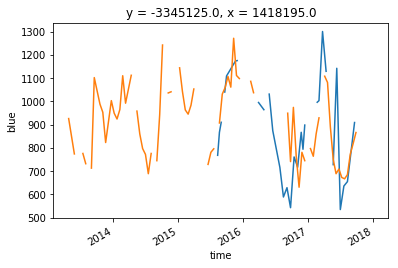

In [16]:
Sentineldatapixel.blue.sel(y = pixely, x = pixelx, method = 'nearest').plot()
Landsatdatapixel.blue.sel(y = pixely, x = pixelx, method = 'nearest').plot()